<a href="https://colab.research.google.com/github/kimsijin33/sizin/blob/master/dnn_mnist_classification_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [ ]:
train_labels[0]

5

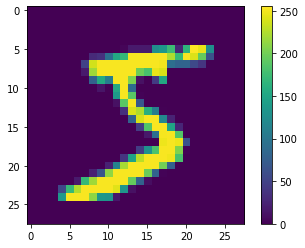

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
# input : Feature, Atrribute => Flatten
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
train_labels[0]

5

In [ ]:
# Label : one hot encoding
from tensorflow.keras.utils import to_categorical

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels.shape, test_labels.shape

((60000, 10), (10000, 10))

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
# 3 Layer :
# input layer feature count : 784(28*28)
# hidden layer perceptron : 512, 'relu'
# output layer perceptron : 10, 'softmax'
model = models.Sequential()
model.add(layers.Dense(units=512,
                       activation='relu',
                       input_shape=(28*28,)))
model.add(layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x=train_images, y=train_labels,
                    epochs=30,
                    batch_size=100,
                    validation_split=0.2)

Epoch 1/30
480/480 [==============================] - 5s 10ms/step - loss: 5.8128 - accuracy: 0.8930 - val_loss: 1.1699 - val_accuracy: 0.9357
Epoch 2/30
480/480 [==============================] - 5s 10ms/step - loss: 0.8459 - accuracy: 0.9510 - val_loss: 0.9608 - val_accuracy: 0.9510
Epoch 3/30
480/480 [==============================] - 5s 10ms/step - loss: 0.5293 - accuracy: 0.9643 - val_loss: 0.7730 - val_accuracy: 0.9598
Epoch 4/30
480/480 [==============================] - 5s 10ms/step - loss: 0.4153 - accuracy: 0.9706 - val_loss: 0.7717 - val_accuracy: 0.9646
Epoch 5/30
480/480 [==============================] - 5s 10ms/step - loss: 0.3495 - accuracy: 0.9759 - val_loss: 0.8816 - val_accuracy: 0.9653
Epoch 6/30
480/480 [==============================] - 5s 10ms/step - loss: 0.3261 - accuracy: 0.9787 - val_loss: 0.8151 - val_accuracy: 0.9644
Epoch 7/30
480/480 [==============================] - 5s 10ms/step - loss: 0.2768 - accuracy: 0.9816 - val_loss: 0.9281 - val_accuracy: 0.9675

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

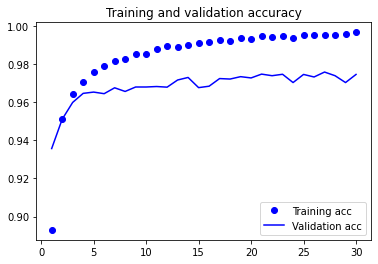

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

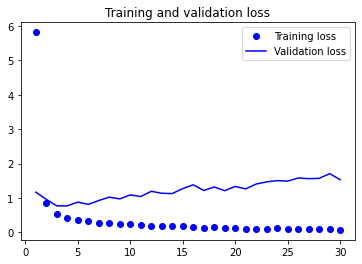

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.3982 - accuracy: 0.9755


In [ ]:
model.save('./ckeckpoint')

INFO:tensorflow:Assets written to: ./ckeckpoint/assets


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
new_model = load_model('./ckeckpoint')

In [ ]:
test_loss, test_acc = new_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.3982 - accuracy: 0.9755


In [ ]:
import numpy as np

In [ ]:
predict = new_model.predict(test_images[0].reshape((1, 28 * 28)))

print('predict probability:', predict)
print('predict number:', np.argmax(predict))

predict probability: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
predict number: [7 2]


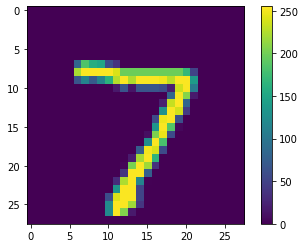

In [ ]:
plt.figure()
plt.imshow(test_images[0].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()